In [ ]:
import pandas as pd

In [ ]:
# use v1.2 datasets; load from our repo for convenience
csv_urls = {
    'members': 'https://raw.githubusercontent.com/ZoeLeBlanc/unknown_borrowers/main/dataset_generator/source_data/SCoData_members_v1.2_2022-01.csv',
    'books': 'https://raw.githubusercontent.com/ZoeLeBlanc/unknown_borrowers/main/dataset_generator/source_data/SCoData_books_v1.2_2022-01.csv',
    'events': 'https://raw.githubusercontent.com/ZoeLeBlanc/unknown_borrowers/main/dataset_generator/source_data/SCoData_events_v1.2_2022-01.csv',
    # project-specific data
    'partial_borrowers': 'https://github.com/ZoeLeBlanc/unknown_borrowers/raw/main/dataset_generator/data/partial_borrowers_collapsed.csv',
    'borrow_overrides': 'https://raw.githubusercontent.com/ZoeLeBlanc/unknown_borrowers/main/dataset_generator/data/long_borrow_overrides.csv'
}

In [ ]:
# load books
books_df = pd.read_csv(csv_urls['books'])

In [ ]:
borrowed_books = books_df[books_df.borrow_count != 0]
total_borrowed_books = borrowed_books.shape[0]
total_borrowed_books

5683

In [ ]:
uncertain_books = books_df[books_df.uncertain].shape[0]
uncertain_books

475

In [ ]:
# load events so we can check by time
events_df = pd.read_csv(csv_urls['events'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# generate short-form id for matching with events and easy comparison
books_df['id'] = books_df.uri.apply(lambda x: x.split('/')[-2])
uncertain_books_df = books_df[books_df.uncertain]
uncertain_books_df[['id', 'title']]

,id,title
1154,miscellaneous-pieces,Miscellaneous Pieces
1312,epictetus,Epictetus
5300,12-30-heaven,12:30 from Heaven
5302,abc-language,ABC of Language
5303,abraham-lincoln,Abraham Lincoln
...,...,...
6011,joyce-work-progress,Work in Progress
6014,w-unclear,W[unclear]
6017,yeats,Yeats
6018,yeats-various-articles,Yeats: Various Articles By & On


In [ ]:
# get all the borrows
borrows = events_df[events_df.event_type == 'Borrow']
# add short-form id
borrows['item_id'] = borrows.item_uri.apply(lambda x: x.split('/')[-2])
borrows.shape[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


21059

In [ ]:
# exclude borrow events fro uncertain titles
certain_borrows = borrows[~borrows.item_id.isin(uncertain_books_df.id)]
certain_borrows.shape[0]

20316

In [ ]:
catalog_df = pd.read_csv("/content/beach_lendinglibrary_catalog.csv")
catalog_df.columns

Index(['Unnamed: 0', 'Author', 'Title', 'Translator', 'Editor', 'Contributor',
       'Illustrator', 'Preface', 'Photographer', 'Pub. Date', 'Format',
       'Site URL', 'Acquisition Date', 'Source', 'Unnamed: 14', 'Fix on Site?',
       'Explain Fix', 'Notes'],
      dtype='object')

In [ ]:
# this is from a data work spreadsheet, limit to the fields we care about
catalog_df = catalog_df[["Author", "Title", "Pub. Date", "Site URL", "Acquisition Date"]]
# rename fields for convenience
catalog_df.rename(columns={"Author": "author", "Title": "title", "Pub. Date": "pub_date", "Site URL": "item_uri", "Acquisition Date": "acq_date"}, inplace=True)
catalog_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,author,title,pub_date,item_uri,acq_date
0,"Morley, Christopher",Being Human: A Story,1932,https://shakespeareandco.princeton.edu/books/m...,1933-03
1,"Hurst, Fannie",Imitation of Life: A Novel,1933,https://shakespeareandco.princeton.edu/books/h...,1933-03
2,"Aldington, Richard",All Men Are Enemies: A Romance,1933,https://shakespeareandco.princeton.edu/books/a...,1933-03
3,"Anthony, Katharine",Marie Antoinette,1933,NaN,1933-03
4,"Jackson, J. Hampden",Europe sInce the War: A Sketch of Political De...,1933,https://shakespeareandco.princeton.edu/books/j...,1933-03
...,...,...,...,...,...
1050,NaN,New Writing Spring 1940,1940,https://shakespeareandco.princeton.edu/books/l...,1940-5
1051,"Wodehouse, P. G.","Eggs, Beans, and Crumpets",1940,https://shakespeareandco.princeton.edu/books/w...,1940-5
1052,"Masterman, Walter S.",The Death Coins,1940,https://shakespeareandco.princeton.edu/books/m...,1940-5
1053,"Teilhet, Darwin and Hildegard Teilhet",The Broken Face Murders,1940,https://shakespeareandco.princeton.edu/books/t...,1940-5


In [ ]:
# add short-form id
catalog_df['item_id'] = catalog_df.item_uri.apply(lambda x: x.split('/')[-2] if pd.notna(x) else None)
catalog_df

,author,title,pub_date,item_uri,acq_date,item_id
0,"Morley, Christopher",Being Human: A Story,1932,https://shakespeareandco.princeton.edu/books/m...,1933-03,morley-human
1,"Hurst, Fannie",Imitation of Life: A Novel,1933,https://shakespeareandco.princeton.edu/books/h...,1933-03,hurst-imitation-life
2,"Aldington, Richard",All Men Are Enemies: A Romance,1933,https://shakespeareandco.princeton.edu/books/a...,1933-03,aldington-men-enemies
3,"Anthony, Katharine",Marie Antoinette,1933,NaN,1933-03,None
4,"Jackson, J. Hampden",Europe sInce the War: A Sketch of Political De...,1933,https://shakespeareandco.princeton.edu/books/j...,1933-03,jackson-europe-since-war
...,...,...,...,...,...,...
1050,NaN,New Writing Spring 1940,1940,https://shakespeareandco.princeton.edu/books/l...,1940-5,lehmann-new-writing-1940
1051,"Wodehouse, P. G.","Eggs, Beans, and Crumpets",1940,https://shakespeareandco.princeton.edu/books/w...,1940-5,wodehouse-eggs-beans-crumpets
1052,"Masterman, Walter S.",The Death Coins,1940,https://shakespeareandco.princeton.edu/books/m...,1940-5,masterman-death-coins
1053,"Teilhet, Darwin and Hildegard Teilhet",The Broken Face Murders,1940,https://shakespeareandco.princeton.edu/books/t...,1940-5,teilhet-broken-face-murders


In [ ]:
# can we parse acquisition date?


catalog_df['acq_date_dt'] = pd.to_datetime(catalog_df.acq_date, errors='coerce')
catalog_df

,author,title,pub_date,item_uri,acq_date,item_id,acq_date_dt
0,"Morley, Christopher",Being Human: A Story,1932,https://shakespeareandco.princeton.edu/books/m...,1933-03,morley-human,1933-03-01
1,"Hurst, Fannie",Imitation of Life: A Novel,1933,https://shakespeareandco.princeton.edu/books/h...,1933-03,hurst-imitation-life,1933-03-01
2,"Aldington, Richard",All Men Are Enemies: A Romance,1933,https://shakespeareandco.princeton.edu/books/a...,1933-03,aldington-men-enemies,1933-03-01
3,"Anthony, Katharine",Marie Antoinette,1933,NaN,1933-03,None,1933-03-01
4,"Jackson, J. Hampden",Europe sInce the War: A Sketch of Political De...,1933,https://shakespeareandco.princeton.edu/books/j...,1933-03,jackson-europe-since-war,1933-03-01
...,...,...,...,...,...,...,...
1050,NaN,New Writing Spring 1940,1940,https://shakespeareandco.princeton.edu/books/l...,1940-5,lehmann-new-writing-1940,1940-05-01
1051,"Wodehouse, P. G.","Eggs, Beans, and Crumpets",1940,https://shakespeareandco.princeton.edu/books/w...,1940-5,wodehouse-eggs-beans-crumpets,1940-05-01
1052,"Masterman, Walter S.",The Death Coins,1940,https://shakespeareandco.princeton.edu/books/m...,1940-5,masterman-death-coins,1940-05-01
1053,"Teilhet, Darwin and Hildegard Teilhet",The Broken Face Murders,1940,https://shakespeareandco.princeton.edu/books/t...,1940-5,teilhet-broken-face-murders,1940-05-01


In [ ]:
# how many acquisitions per month?

acq_weekly_count = catalog_df.groupby([pd.Grouper(key='acq_date_dt', freq='M')])['title'].count().reset_index()
acq_weekly_count.rename(columns={'title': 'total'}, inplace=True)
acq_weekly_count

,acq_date_dt,total
0,1933-03-31,27
1,1933-04-30,12
2,1933-05-31,16
3,1933-06-30,10
4,1933-07-31,10
...,...,...
82,1940-01-31,3
83,1940-02-29,5
84,1940-03-31,12
85,1940-04-30,8


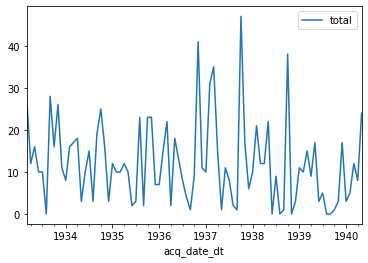

In [ ]:
acq_weekly_count.plot.line(y='total', x='acq_date_dt')

In [ ]:
acq_weekly_count.total.describe()

count    87.000000
mean     12.091954
std       9.931899
min       0.000000
25%       3.000000
50%      10.000000
75%      17.000000
max      47.000000
Name: total, dtype: float64

average is 12 books per month; some months with zero, others with as many as 47

In [ ]:
# which months were zero?
acq_weekly_count[acq_weekly_count.total == 0]

,acq_date_dt,total
5,1933-08-31,0
63,1938-06-30,0
65,1938-08-31,0
68,1938-11-30,0
77,1939-08-31,0
78,1939-09-30,0


In [ ]:
# which months had the most?
acq_weekly_count.sort_values('total', ascending=False).head(10)

,acq_date_dt,total
55,1937-10-31,47
44,1936-11-30,41
67,1938-10-31,38
48,1937-03-31,35
47,1937-02-28,31
6,1933-09-30,28
0,1933-03-31,27
8,1933-11-30,26
19,1934-10-31,25
86,1940-05-31,24


In [ ]:
# compare to the library overall? 

catalog_total_books = catalog_df.shape[0]
catalog_total_books

1055

In [ ]:
unknown_books = catalog_df[catalog_df.item_id.isna()]

In [ ]:
total_unknown_books = unknown_books.shape[0]
total_unknown_books

106

In [ ]:
# what percent of these books were previously unknown?

total_unknown_books / catalog_total_books * 100

10.04739336492891

In [ ]:
# what dates does the catalog cover?
catalog_df['acq_date_dt'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                    1052
unique                     81
top       1937-10-01 00:00:00
freq                       47
first     1933-03-01 00:00:00
last      1940-05-01 00:00:00
Name: acq_date_dt, dtype: object

In [ ]:
# what if we filter to borrowing activity from this time period?
# should be similar, right? ... 
# we wouldn't expect to have activity unless these are replacement books
# (but most of them are new!)

from datetime import date

# parse start date so we can compare
borrows['start_date_dt'] = pd.to_datetime(borrows['start_date'], errors='coerce')

# get all borrows after 1933-03-01 and before 1940-05-01
catalog_dates_borrows = borrows[borrows.start_date_dt >= pd.to_datetime(date(1933, 3, 1))][borrows.start_date_dt <= pd.to_datetime(date(1940, 6, 1))]

# how many unique books in this time?
len(catalog_dates_borrows.item_id.unique())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


3396

In [ ]:
catalog_dates_borrows.start_date_dt.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   10911
unique                   2054
top       1939-07-27 00:00:00
freq                       43
first     1933-03-01 00:00:00
last      1940-06-01 00:00:00
Name: start_date_dt, dtype: object

In [ ]:
# are any of the books with ids not in this borrow data?

catalog_df[~catalog_df.item_id.isin(catalog_dates_borrows.item_id.unique())]

,author,title,pub_date,item_uri,acq_date,item_id,acq_date_dt
3,"Anthony, Katharine",Marie Antoinette,1933,NaN,1933-03,None,1933-03-01
15,"Bradby, G. F.",The Brontes and Other Essays,1932,NaN,1933-03,None,1933-03-01
18,"Crofts, F. W.",The Hog's Back Mystery,1933,NaN,1933-03,None,1933-03-01
19,"Pankhurst, Sylvia",The Home Front: A Mirror to Life in England du...,1932,NaN,1933-03,None,1933-03-01
21,"Scott, Howard",Introduction to Technocracy,1933,NaN,1933-03,None,1933-03-01
...,...,...,...,...,...,...,...
1050,NaN,New Writing Spring 1940,1940,https://shakespeareandco.princeton.edu/books/l...,1940-5,lehmann-new-writing-1940,1940-05-01
1051,"Wodehouse, P. G.","Eggs, Beans, and Crumpets",1940,https://shakespeareandco.princeton.edu/books/w...,1940-5,wodehouse-eggs-beans-crumpets,1940-05-01
1052,"Masterman, Walter S.",The Death Coins,1940,https://shakespeareandco.princeton.edu/books/m...,1940-5,masterman-death-coins,1940-05-01
1053,"Teilhet, Darwin and Hildegard Teilhet",The Broken Face Murders,1940,https://shakespeareandco.princeton.edu/books/t...,1940-5,teilhet-broken-face-murders,1940-05-01


In [ ]:
# what is the first borrow for each book in the catalog?

catalog_borrows = borrows[borrows.item_id.isin(catalog_df.item_id)]

catalog_borrows.shape[0]

5144

In [ ]:
# get the first borrow for each catalog book

catalog_first_borrows = catalog_borrows.groupby('item_id')['start_date_dt'].min().reset_index()
catalog_first_borrows

,item_id,start_date_dt
0,a-e-living-torch,1937-11-23
1,a-e-song-fountains,1934-01-22
2,abbe-around-world-eleven,1937-01-26
3,adamic-cradle-life-story,1937-04-14
4,adams-march-democracy-history,1933-05-11
...,...,...
908,zweig-beware-pity,1939-05-16
909,zweig-erasmus-rotterdam,1934-11-10
910,zweig-marie-antoinette-portrait,1934-10-03
911,zweig-mary-queen-scotland,1936-01-18


In [ ]:
catalog_borrowing = pd.merge(catalog_df, catalog_first_borrows.rename(columns={'start_date_dt': 'first_borrow'}))
catalog_borrowing

,author,title,pub_date,item_uri,acq_date,item_id,acq_date_dt,first_borrow
0,"Morley, Christopher",Being Human: A Story,1932,https://shakespeareandco.princeton.edu/books/m...,1933-03,morley-human,1933-03-01,1934-04-01
1,"Hurst, Fannie",Imitation of Life: A Novel,1933,https://shakespeareandco.princeton.edu/books/h...,1933-03,hurst-imitation-life,1933-03-01,1933-09-25
2,"Aldington, Richard",All Men Are Enemies: A Romance,1933,https://shakespeareandco.princeton.edu/books/a...,1933-03,aldington-men-enemies,1933-03-01,1933-04-01
3,"Jackson, J. Hampden",Europe sInce the War: A Sketch of Political De...,1933,https://shakespeareandco.princeton.edu/books/j...,1933-03,jackson-europe-since-war,1933-03-01,1933-05-29
4,"Sugimoto, Etsu Inaqaki",A Daughter of the Samurai: How a Daughter of F...,1925,https://shakespeareandco.princeton.edu/books/s...,1933-03,sugimoto-daughter-samurai,1933-03-01,1933-03-07
...,...,...,...,...,...,...,...,...
919,"Greene, Graham",The Power and the Glory,1940,https://shakespeareandco.princeton.edu/books/g...,1940-5,greene-power-glory,1940-05-01,1940-05-21
920,"Wodehouse, P. G.","Eggs, Beans, and Crumpets",1940,https://shakespeareandco.princeton.edu/books/w...,1940-5,wodehouse-eggs-beans-crumpets,1940-05-01,1940-09-19
921,"Masterman, Walter S.",The Death Coins,1940,https://shakespeareandco.princeton.edu/books/m...,1940-5,masterman-death-coins,1940-05-01,1940-06-22
922,"Teilhet, Darwin and Hildegard Teilhet",The Broken Face Murders,1940,https://shakespeareandco.princeton.edu/books/t...,1940-5,teilhet-broken-face-murders,1940-05-01,1941-04-23


In [ ]:
catalog_borrowing.first_borrow.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                     924
unique                    704
top       1936-08-03 00:00:00
freq                        5
first     1922-01-25 00:00:00
last      1943-05-10 00:00:00
Name: first_borrow, dtype: object

In [ ]:
# which ones were borrowed before this catalog?
# only two... 
catalog_borrowing[catalog_borrowing.first_borrow <= pd.to_datetime(date(1930, 3, 1))]

,author,title,pub_date,item_uri,acq_date,item_id,acq_date_dt,first_borrow
783,NaN,Samuel Taylor Coleridge,?,https://shakespeareandco.princeton.edu/books/s...,1938-10,samuel-taylor-coleridge,1938-10-01,1922-01-25
901,"Gorman, Herbert Sherman",James Joyce: His First Forty Years,1924,https://shakespeareandco.princeton.edu/books/g...,1940-4,gorman-james-joyce-first,1940-04-01,1924-04-05


In [ ]:
# to estimate properly, really need to know % of borrowing activity for early period / late period and compare ...

# filter to all borrowing during this time period

borrows['year'] = borrows.start_date_dt.apply(lambda x: x.year if pd.notna(x) else None)
borrows

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,event_type,start_date,end_date,member_uris,member_names,member_sort_names,subscription_price_paid,subscription_deposit,subscription_duration,subscription_duration_days,subscription_volumes,subscription_category,subscription_purchase_date,reimbursement_refund,borrow_status,borrow_duration_days,purchase_price,currency,item_uri,item_title,item_volume,item_authors,item_year,item_notes,source_type,source_citation,source_manifest,source_image,item_id,start_date_dt,year
2,Borrow,1922,1922-08-23,https://shakespeareandco.princeton.edu/members...,Mr. Rhys,"Rhys, Mr.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/c...,Typhoon,NaN,"Conrad, Joseph",1902.0,NaN,Lending Library Card,"Sylvia Beach, Rhys Lending Library Card, Box 4...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/67...,conrad-typhoon,1922-01-01,1922.0
8,Borrow,1923,1923-11-07,https://shakespeareandco.princeton.edu/members...,Eyre de Lanux / Mrs. Pierre de Lanux,"de Lanux, Eyre",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/w...,Night and Day,NaN,"Woolf, Virginia",1919.0,NaN,Lending Library Card,"Sylvia Beach, Eyre de Lanux Lending Library Ca...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/c5...,woolf-night-day,1923-01-01,1923.0
12,Borrow,1924,1924-10-22,https://shakespeareandco.princeton.edu/members...,Simone Téry,"Téry, Simone",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/j...,James Joyce,NaN,NaN,NaN,Unidentified. By or about Joyce.,Lending Library Card,"Sylvia Beach, Mlle Simone Tery Lending Library...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/c2...,james-joyce,1924-01-01,1924.0
13,Borrow,1924,1924-10-22,https://shakespeareandco.princeton.edu/members...,Simone Téry,"Téry, Simone",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/f...,A Portrait of George Moore in a Study of His Work,NaN,"Freeman, John",1922.0,NaN,Lending Library Card,"Sylvia Beach, Mlle Simone Tery Lending Library...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/c2...,freeman-portrait-george-moore,1924-01-01,1924.0
22,Borrow,1926,1926-01-14,https://shakespeareandco.princeton.edu/members...,Ada (Hitchcock) MacLeish;Archibald MacLeish,"MacLeish, Ada;MacLeish, Archibald",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/s...,Tents of Israel,NaN,"Stern, G. B.",1924.0,NaN,Lending Library Card,"Sylvia Beach, Ada and Archibald MacLeish Lendi...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/22...,stern-tents-israel,1926-01-01,1926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35457,Borrow,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Bernard Hommel,"Hommel, Bernard",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/h...,Poems,NaN,"Heine, Heinrich",NaN,NaN,Lending Library Card,"Sylvia Beach, Bernard Hommel Lending Library C...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/e4...,heine-poems,NaT,NaN
35460,Borrow,NaN,NaN,https://shakespeareandco.princeton.edu/members...,Bernard Hommel,"Hommel, Bernard",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/c...,Exile's Return: A Narrative of Ideas,NaN,"Cowley, Malcolm",1934.0,NaN,Lending Library Card,"Sylvia Beach, Bernard Hommel Lending Library C...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/e4...,cowley-exiles-return-narrative,NaT,NaN
35463,Borrow,NaN,NaN,https://shakespeareandco.princeton.ed

In [ ]:
catalog_start_date = catalog_df.acq_date_dt.min()
catalog_start_date

Timestamp('1933-03-01 00:00:00')

In [ ]:
catalog_end_date = catalog_df.acq_date_dt.max()
catalog_end_date


Timestamp('1940-05-01 00:00:00')

In [ ]:
def get_best_date(row):
  # dates are strings; return the longest
  start_date_len = len(row.start_date) if pd.notna(row.start_date) else 0
  end_date_len = len(row.end_date) if pd.notna(row.end_date) else 0

  if start_date_len > end_date_len:
    return row.start_date
  else:
    return row.end_date

# get either start or end date, whichever we find first

all_borrows = borrows.copy()
all_borrows['date'] = all_borrows.apply(get_best_date, axis=1)
all_borrows[['start_date', 'end_date', 'date']].head()

,start_date,end_date,date
2,1922,1922-08-23,1922-08-23
8,1923,1923-11-07,1923-11-07
12,1924,1924-10-22,1924-10-22
13,1924,1924-10-22,1924-10-22
22,1926,1926-01-14,1926-01-14


In [ ]:
all_borrows['date_dt'] = pd.to_datetime(all_borrows.date, errors='coerce')

In [ ]:
catalog_dates_borrows = all_borrows[all_borrows.date_dt >= catalog_start_date][all_borrows.date_dt <= catalog_end_date]
catalog_dates_borrows.shape[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


10759

In [ ]:
catalog_dates_borrows.sort_values('date_dt').head()

,event_type,start_date,end_date,member_uris,member_names,member_sort_names,subscription_price_paid,subscription_deposit,subscription_duration,subscription_duration_days,subscription_volumes,subscription_category,subscription_purchase_date,reimbursement_refund,borrow_status,borrow_duration_days,purchase_price,currency,item_uri,item_title,item_volume,item_authors,item_year,item_notes,source_type,source_citation,source_manifest,source_image,item_id,start_date_dt,year,date,date_dt
13662,Borrow,1933-02-22,1933-03-01,https://shakespeareandco.princeton.edu/members...,Donald Culver,"Culver, Donald",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,7.0,NaN,NaN,https://shakespeareandco.princeton.edu/books/t...,The Adventures of Tom Sawyer,NaN,"Twain, Mark",1876.0,NaN,Lending Library Card,"Sylvia Beach, Donald Culver Lending Library Ca...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/b3...,twain-adventures-tom-sawyer,1933-02-22,1933.0,1933-03-01,1933-03-01
13646,Borrow,1933-02-17,1933-03-01,https://shakespeareandco.princeton.edu/members...,Donald Culver,"Culver, Donald",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,12.0,NaN,NaN,https://shakespeareandco.princeton.edu/books/m...,Conquistador,NaN,"MacLeish, Archibald",1933.0,NaN,Lending Library Card,"Sylvia Beach, Donald Culver Lending Library Ca...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/b3...,macleish-conquistador,1933-02-17,1933.0,1933-03-01,1933-03-01
13659,Borrow,1933-02-21,1933-03-01,https://shakespeareandco.princeton.edu/members...,Aline Prot,"Prot, Aline",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,8.0,NaN,NaN,https://shakespeareandco.princeton.edu/books/w...,The Gods Arrive,NaN,"Wharton, Edith",1932.0,NaN,Lending Library Card,"Sylvia Beach, Aline Prot Lending Library Card,...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif-cloud.princeton.edu/iiif/2/3d%2F9...,wharton-gods-arrive,1933-02-21,1933.0,1933-03-01,1933-03-01
13664,Borrow,1933-02-23,1933-03-03,https://shakespeareandco.princeton.edu/members...,Phyllis Price,"Price, Phyllis",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,8.0,NaN,NaN,https://shakespeareandco.princeton.edu/books/l...,The Letters of D. H. Lawrence,NaN,"Lawrence, D. H.",1932.0,NaN,Lending Library Card,"Sylvia Beach, Phyllis Price Lending Library Ca...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/31...,lawrence-letters-h-lawrence,1933-02-23,1933.0,1933-03-03,1933-03-03
13665,Borrow,1933-02-23,1933-03-03,https://shakespeareandco.princeton.edu/members...,Thérèse Tony-Mayer,"Tony-Mayer, Thérèse",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,8.0,NaN,NaN,https://shakespeareandco.princeton.edu/books/f...,Light in August,NaN,"Faulkner, William",1932.0,NaN,Lending Library Card,"Sylvia Beach, Thérèse Tony-Mayer Lending Libra...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/50...,faulkner-light-august,1933-02-23,1933.0,1933-03-03,1933-03-03


In [ ]:
catalog_dates_borrows.sort_values('date_dt').head()

,event_type,start_date,end_date,member_uris,member_names,member_sort_names,subscription_price_paid,subscription_deposit,subscription_duration,subscription_duration_days,subscription_volumes,subscription_category,subscription_purchase_date,reimbursement_refund,borrow_status,borrow_duration_days,purchase_price,currency,item_uri,item_title,item_volume,item_authors,item_year,item_notes,source_type,source_citation,source_manifest,source_image,item_id,start_date_dt,year,date,date_dt
13662,Borrow,1933-02-22,1933-03-01,https://shakespeareandco.princeton.edu/members...,Donald Culver,"Culver, Donald",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,7.0,NaN,NaN,https://shakespeareandco.princeton.edu/books/t...,The Adventures of Tom Sawyer,NaN,"Twain, Mark",1876.0,NaN,Lending Library Card,"Sylvia Beach, Donald Culver Lending Library Ca...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/b3...,twain-adventures-tom-sawyer,1933-02-22,1933.0,1933-03-01,1933-03-01
13646,Borrow,1933-02-17,1933-03-01,https://shakespeareandco.princeton.edu/members...,Donald Culver,"Culver, Donald",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,12.0,NaN,NaN,https://shakespeareandco.princeton.edu/books/m...,Conquistador,NaN,"MacLeish, Archibald",1933.0,NaN,Lending Library Card,"Sylvia Beach, Donald Culver Lending Library Ca...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/b3...,macleish-conquistador,1933-02-17,1933.0,1933-03-01,1933-03-01
13659,Borrow,1933-02-21,1933-03-01,https://shakespeareandco.princeton.edu/members...,Aline Prot,"Prot, Aline",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,8.0,NaN,NaN,https://shakespeareandco.princeton.edu/books/w...,The Gods Arrive,NaN,"Wharton, Edith",1932.0,NaN,Lending Library Card,"Sylvia Beach, Aline Prot Lending Library Card,...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif-cloud.princeton.edu/iiif/2/3d%2F9...,wharton-gods-arrive,1933-02-21,1933.0,1933-03-01,1933-03-01
13664,Borrow,1933-02-23,1933-03-03,https://shakespeareandco.princeton.edu/members...,Phyllis Price,"Price, Phyllis",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,8.0,NaN,NaN,https://shakespeareandco.princeton.edu/books/l...,The Letters of D. H. Lawrence,NaN,"Lawrence, D. H.",1932.0,NaN,Lending Library Card,"Sylvia Beach, Phyllis Price Lending Library Ca...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/31...,lawrence-letters-h-lawrence,1933-02-23,1933.0,1933-03-03,1933-03-03
13665,Borrow,1933-02-23,1933-03-03,https://shakespeareandco.princeton.edu/members...,Thérèse Tony-Mayer,"Tony-Mayer, Thérèse",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,8.0,NaN,NaN,https://shakespeareandco.princeton.edu/books/f...,Light in August,NaN,"Faulkner, William",1932.0,NaN,Lending Library Card,"Sylvia Beach, Thérèse Tony-Mayer Lending Libra...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/50...,faulkner-light-august,1933-02-23,1933.0,1933-03-03,1933-03-03


In [ ]:
# how many total borrow events?
catalog_dates_borrows.shape[0]

10759

In [ ]:
# how many unique titles?
len(catalog_dates_borrows.item_id.unique())

3364

In [ ]:
# how many events with uncertain titles?
uncertain_catalog_dates_borrows = catalog_dates_borrows[catalog_dates_borrows.item_id.isin(uncertain_books_df.id)]
uncertain_catalog_dates_borrows.shape[0]

308

In [ ]:
# how many uncertain titles?
len(uncertain_catalog_dates_borrows.item_id.unique())

191

In [ ]:
# ok, enough that we should filter them out; exclude the uncertain ones
certain_catalog_dates_borrows = catalog_dates_borrows[~catalog_dates_borrows.item_id.isin(uncertain_books_df.id)]
certain_catalog_dates_borrows.shape[0]

10451

In [ ]:
len(certain_catalog_dates_borrows.item_id.unique())

3173

In [ ]:
# what percent of those titles are included in the catalog?
# limit to borrow events for items in the catalog
certain_catalog_dates_catalog_borrows = certain_catalog_dates_borrows[certain_catalog_dates_borrows.item_id.isin(catalog_df.item_id)]
certain_catalog_dates_catalog_borrows.head()

,event_type,start_date,end_date,member_uris,member_names,member_sort_names,subscription_price_paid,subscription_deposit,subscription_duration,subscription_duration_days,subscription_volumes,subscription_category,subscription_purchase_date,reimbursement_refund,borrow_status,borrow_duration_days,purchase_price,currency,item_uri,item_title,item_volume,item_authors,item_year,item_notes,source_type,source_citation,source_manifest,source_image,item_id,start_date_dt,year,date,date_dt
149,Borrow,1937,1937-06-01,https://shakespeareandco.princeton.edu/members...,Fernand Colens,"Colens, Fernand",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/d...,The Friendly Tree,NaN,"Day Lewis, C.",1936.0,NaN,Lending Library Card,"Sylvia Beach, Fernand Colens Lending Library C...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif-cloud.princeton.edu/iiif/2/6d%2F7...,day-lewis-friendly-tree,1937-01-01,1937.0,1937-06-01,1937-06-01
150,Borrow,1937,1937-12-08,https://shakespeareandco.princeton.edu/members...,Fanny Rirachowsky,"Rirachowsky, Fanny",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/s...,Poems,NaN,"Spender, Stephen",1933.0,NaN,Lending Library Card,"Sylvia Beach, Fanny Rirachowsky Lending Librar...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif-cloud.princeton.edu/iiif/2/b8%2F1...,spender-poems,1937-01-01,1937.0,1937-12-08,1937-12-08
156,Borrow,1938,1938-06-23,https://shakespeareandco.princeton.edu/members...,Thérèse Bertrand-Fontaine,"Bertrand-Fontaine, Thérèse",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/c...,To Wake the Dead,NaN,"Carr, John Dickson",1937.0,NaN,Lending Library Card,"Sylvia Beach, René Leibowitz Lending Library C...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif-cloud.princeton.edu/iiif/2/2b%2F4...,carr-wake-dead,1938-01-01,1938.0,1938-06-23,1938-06-23
157,Borrow,1938,NaN,https://shakespeareandco.princeton.edu/members...,Sonnabend,Sonnabend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/m...,Across Spoon River: An Autobiography,NaN,"Masters, Edgar Lee",1936.0,NaN,Lending Library Card,"Sylvia Beach, René Leibowitz Lending Library C...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif-cloud.princeton.edu/iiif/2/2b%2F4...,masters-across-spoon-river,1938-01-01,1938.0,1938,1938-01-01
168,Borrow,1938,1938-06-25,https://shakespeareandco.princeton.edu/members...,Thérèse Bertrand-Fontaine,"Bertrand-Fontaine, Thérèse",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/b...,Enchanter's Nightshade,NaN,"Bridge, Ann",1937.0,NaN,Lending Library Card,"Sylvia Beach, René Leibowitz Lending Library C...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif-cloud.princeton.edu/iiif/2/2b%2F4...,bridge-enchanters-nightshade,1938-01-01,1938.0,1938-06-25,1938-06-25


In [ ]:
# how many events?
certain_catalog_dates_catalog_borrows.shape[0]

4313

In [ ]:
# how many titles?
len(certain_catalog_dates_catalog_borrows.item_id.unique())

880

In [ ]:
# ok, what percent of the circulation is that?
# catalog_dates_total_borrows = catalog_dates_borrows.shape[0]
# just work with the certain ones, for simplicity
catalog_dates_total_borrows = certain_catalog_dates_borrows.shape[0]
catalog_dates_total_items = len(certain_catalog_dates_borrows.item_id.unique())


catalog_dates_catalog_total_borrows = certain_catalog_dates_catalog_borrows.shape[0]
catalog_dates_catalog_total_items = len(certain_catalog_dates_catalog_borrows.item_id.unique())

In [ ]:
# catalog books account for what % of borrowing activity during this time?

catalog_dates_catalog_total_borrows / catalog_dates_total_borrows

0.41268778107358145

In [ ]:
# and what % of books in circulation?

catalog_dates_catalog_total_items / catalog_dates_total_items

0.277340056728648